# L5

Ref: C. Bishop "Machine Learning", Ch.1-3

Na tych ćwiczeniach:
    * Omówimy matematycznie podstawowy cel uczenia maszynowego
    * Omówimy ewaluacje
    * Omówimy bias-variance
    * Zdefiniujemy co mamy na myśli mówiąc "regularyzacja"
    * Omówimy związek tradycyjnej regularyzacji z wnioskowaniem Bayesowskim 

Omówiliśmy podejście Bayesowskie, aż do prawdziwego postawienia bayesowskiej regresji liniowej.

Zapomnijmy na chwile o tym wszystkim.

<img width=500 src="figures/L5/plane.jpg">

In [15]:
# Przydatne funkcje
import numpy as np
import matplotlib.pyplot as pl
def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

# Koncept: dane to losowa próbka

<img width=400 src="figures/L5/the-seventh-seal-chess-game.jpg">

In [16]:
# Dane w regresji
x, y = sample(16)
pl.plot(x, y, 'k.')
pl.plot(f_x, f_y)

AttributeError: 'module' object has no attribute 'randn'

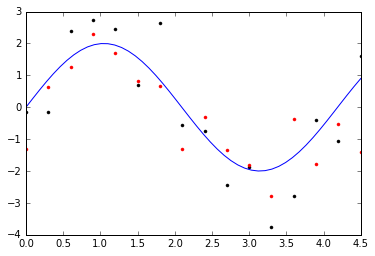

In [36]:
# Inny zbior danych - moglismy tez taki otrzymac!
prev_x, prev_y = x, y
x, y = sample(16)
pl.plot(prev_x, prev_y, 'k.', color='black')
pl.plot(x, y, 'k.', color='r')
pl.plot(f_x, f_y)

# Ewaluacja 

To co nas obchodzi to błąd na nowych danych (z niebieskiej kreski).

Zapiszmy matematycznie podstawowy cel uczenia maszynowego.

$ \mbox{Expected loss} = \mathbb{E}[L] = \int \int L(\textbf{y}, f(\textbf{x})) p(\textbf{x},  \textbf{y}) dx dy $

Chcemy mieć najmniejszy błąd na wszystkich przyszłych zbiorach danych. 

**Cel**: jak aproksymowac ``Expected loss`` ?

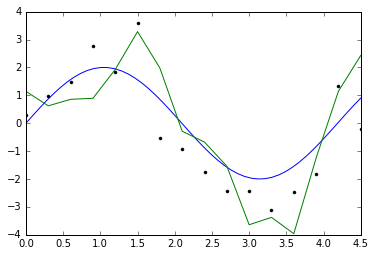

In [40]:
# Tu sie dopasowalismy
X_train, y_train = sample(16)
overfitted_model = fit_polynomial(X_train, y_train, 15)
p_y = apply_polynomial(overfitted_model, X_train)
pl.plot(f_x, f_y)
pl.plot(X_train, y, 'k.')
pl.plot(X_train, p_y)

## Cwiczenie 1 [2pkt] 

(Do zrobienia przed przejściem dalej)

Jaki "Expected loss" będzie miał model "overfitted_model"?

Hint: mamy możliwość samplowania punktów z rozkładu $p(\textbf{x},  \textbf{y})$

## Założenie i.i.d.

Ale zwykle nie mamy dostępu do funkcji "sample". Załóżmy, że nasze dane trenujące (X_train, y_train) są i.i.d. z rozkładu łącznego (X, Y). Wtedy możemy znaleźć przybliżenie "Expected loss"!

## Test set 

Skoro nasze dane są i.i.d., to znaczy że jeśli podzielimy je 2 losowe podzbiory (X_train, y_train) oraz (X_test, y_test) to (X_test, y_test) też będą i.i.d.

Jeśli nie będziemy trenować na X_test, y_test to błąd na zbiorze testującym

$$\mbox{Empirical loss} = \sum_{i=1}^{N} L(\textbf{y_i}, f(\textbf{x_i})) $$

będzie **estymatorem** ``Expected loss`` (definicja estymatora później)

## Cross validation

Estymator ``Empirical loss`` ma dużą wariancję (no bo może akurat wylosowaliśmy prosty zbiór testujący). Aby zmniejszyć jego wariancję możemy losować pare podziałów i uśrednić.

<img src="figures/L3/K-fold_cross_validation_EN.jpg">

# Bias variance

W czasie dalszej rozmowy definiujemy: model to zbiór hipotez.

(też pojawia się na rozmowach kwalifikacyjnych)

``Expected loss`` można sprytnie rozbić dla błędu średnio-kwadratowego [wyprowadzić na tablicy, ref: Bishop p. 149]:

$ \mbox{Expected loss} = \mathbb{E}_D[L] = \mathbb{E}_D[(y - f(x, D))^2]  = (\mathbb{E}_D(y) - f(x, D))^2 + \mathbb{E}_D[(f(x, D) - \mathbb{E}_D(f(x, D)))^2] = \mbox{bias}^2 + \mbox{variance}$

Dla innych błędów także zachodzą odpowiednie dekompozycje bias-variance, ale są bardziej skomplikowane.

Uwaga: nie rozważamy tutaj szumu dla uproszczenia.

## Intuicja 1

Samplujemy 2 punkty z funkcji f(x) = sin(x):

<img width=450 src="figures/L5/b1.png">
<img width=450 src="figures/L5/b2.png">
<img width=450 src="figures/L5/b3.png">

## Intuicja 2

Każda rzutka to ``expected loss`` modelu (modele uczone na różnych samplach). Środek to najlepszy model. Od teraz każdy model będziemy rozważać w tych 4 kategoriach.

<img width=350 src="figures/L5/bias_variance.png">

## Poziom 1 wtajemniczenia

1. Samplujemy punkty z rozkładu sinus + szum. 
2. Fitujemy regresje liniową jak na L4 
3. Wracamy do 1 i rysujemy wynik dla paru iteracji

In [12]:
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

AttributeError: 'module' object has no attribute 'randn'

In [11]:
model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

NameError: name 'x' is not defined

## Cwiczenie 1 [2 pkt]

W idealnym świecie, jeśli mielibyśmy dostęp do procesu generowania danych to możnaby znaleźć optymalny model oraz oszacować jego bias i variance.

1. Napisz kod, ktory liczy bias, variance oraz MSE dla różnych wartości K.

2. Dla jakich wartości można powiedzieć że mamy model "High variance/low bias"?

3. Jaka wartość daje minimum błędu

Oczekiwany wynik: 

<img src="figures/L5/L5_1_wynik.png">

In [7]:
def cals(k):
    f_x, f_y = f(50)
    models = []
    for i in range(100):
        x_train, y_train = sample(100)
        model = fit_polynomial(x_train, y_train, k)
        models.append(model)
    g = lambda x: (1/float(len(models))) * sum([model.predict(x) for model in models])
    bias = 0
    variance = 0
    for j in range(len(f_x)):
        bias += (g(f_x[j]) - f_y[j])**2
        for m in range(len(models)):
            variance += (g(f_x[j]) - models[m].predict(f_x[j]))**2
    variance /= float(len(models))
    bias /= float(len(models))
    mse = bias**2 + variance #????
    return [bias, variance, mse]
for k in range(1, 9):
    biases = []
    variances = []
    mses = []
    [bias,variance,mse] = cals(k)
    biases.append(bias)
    variances.append(variance)
    mses.append()
print biases, variances, mses
    # Plot


NameError: global name 'pl' is not defined

### Poziom 2 wtajemniczenia

Ref: https://en.wikipedia.org/wiki/Estimator, http://blog.evjang.com/2016/09/variance-reduction-part1.html

Mówiliśmy o błędzie modelu. Bias-variance dotyczy *dowolnej estymacji*! (np. pogody lub średniej)

Zdefiniujmy dowolny estymator: $\hat{\theta}(X)$ np:

* $mean(x_1, \ldots, x_n) = \frac{1}{n} \sum x_i$
* $cov(x_1, \ldots, x_n) = \frac{1}{n-1} \sum x_i^T x_i$


Wtedy także zachodzi:

$MSE(\hat{\theta}(X)) = var(\hat{\theta}) +  (B(\hat{\theta}))^2$

Estymatorem też są dowolne metody Monte Carlo, np. estymujące prawdopodobieństwo wygrania w Monty Hall lub powierzchnie figury. Podobnie jak w machine learningu, istnieją sposoby zmniejszenia wariancji. Np. w metodach Monte Carlo estymujących wartość funkcji można samplować nie losowe punkty, are pary punktów na przeciwko siebie względem środka.

<img width=300 src="figures/L5/mc_target.png">
<img width=300 src="figures/L5/mc_norm.png">
<img width=300 src="figures/L5/mc_ant.png">

## Cwiczenie 2 [1 pkt]

Im więcej podziałów w Cross Validation tym mniejczy czy większy variance estymatora? Odpowiedź uzasadnij.

# Regularyzacja

Przez regularyzacje rozumiem faworyzowanie "prostszych" hipotez w ramach danego zbioru hipotez (modelu). Mówiąc inaczej, regularyzacja zwiększa bias kosztem wariancji. Przykładami regularyzacji są L1/L2.

## Regularyzacja - podejście "praktyczne"

Patrząc na wykresy w sekcji "Bias variance" logiczne wydaje się ograniczenie norm parametrów:

$ C(M) = \sum_i || f(x) - y) ||_2^2 + \lambda ||\theta||^2 $

Wtedy niemożliwe (tzn. będzie lepsze rozwiązanie w klasie hipotez) będzie dokładne dopasowanie się do 10 punktów jeśli uczymy wielomian 10 stopnia. 

### Kontury funkcji kosztu

Poziomice C(M), osobno dla 2 członów (MSE oraz regularyzacja). Prawy wykres to L1, lewy to L2.

<img width=600 src="figures/L5/cont.png">

### Formalizacja Bayesowska regularyzacji

Podejście Bayesowskie formalizuje powyższą intuicję i to wszystko! Jeśli nasz prior odpowiada rzeczywistości, to błąd na zbiorze testującym będzie niski.

Faktycznie - w rzeczywistości często funkcje/zjawiska są wytłumaczalne przez małą ilość zmiennych (regularyzacja L1), dlatego też jest ona tak wysoce skuteczna.

## Cwiczenie 3 [1 pkt]

Pokaż, że logposterior ($log p(\theta | X, y)$) dla regresji liniowej ma taką postać jak $C(M)$.

### Inne przykłady regularyzacji

* Model najbliższych sąsiadów (k-NN)

* Estymacja gęstości (szerokość jądra funkcji bazowych)

* Dropout w sieciach neuronowych